# Set up basic experiment to measure convergence times for theoretical setting

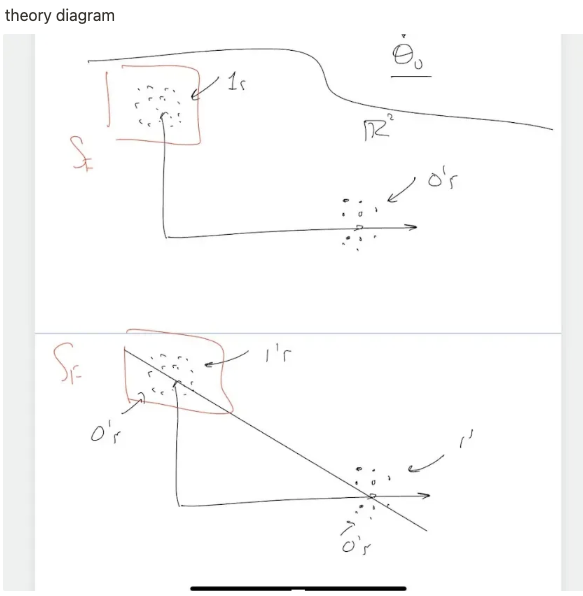

work todo:
1. set up data as above
2. produce 2 settings (above and below)
3. train Logistic regression, or SVM (something simple)
4. run Oracle Matching as an unlearning technique
5. measure of unlearning success?
    0. probability of margins 
    1. KLOM
    2. FIT?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate interesting Forget Sets

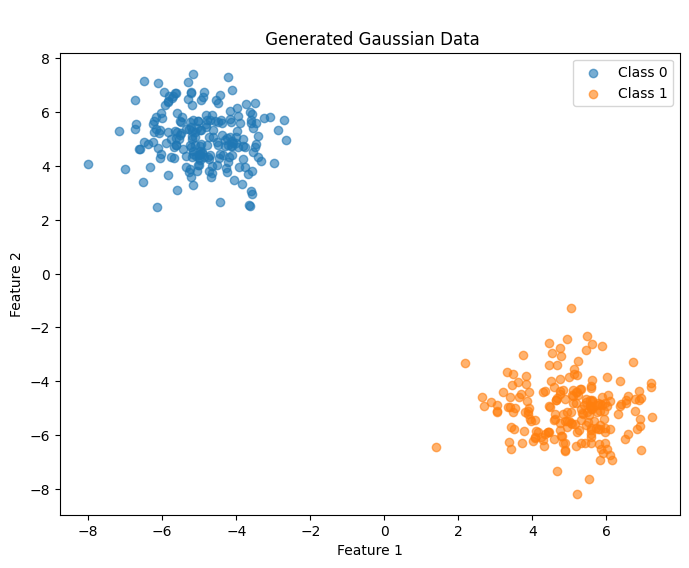

In [2]:
def generate_gaussians(n_samples=500, d=2, mean1=None, mean2=None, cov1=None, cov2=None, sigma= 1.):
    """
    Generate two Gaussian distributions with specified means and covariances.

    Args:
        n_samples (int): Number of samples to generate for each class.
        d (int): Number of dimensions for the Gaussians (default is 2).
        mean1 (array): Mean of the first Gaussian.
        mean2 (array): Mean of the second Gaussian.
        cov1 (array): Covariance matrix of the first Gaussian.
        cov2 (array): Covariance matrix of the second Gaussian.

    Returns:
        X (ndarray): Combined data from both Gaussians.
        y (ndarray): Labels for the data (0 or 1).
    """
    if mean1 is None:
        mean1 = np.zeros(d)
    if mean2 is None:
        mean2 = np.ones(d) * 2
    if cov1 is None:
        cov1 = np.eye(d) * sigma
    if cov2 is None:
        cov2 = np.eye(d) * sigma

    data1 = np.random.multivariate_normal(mean1, cov1, n_samples)
    data2 = np.random.multivariate_normal(mean2, cov2, n_samples)

    X = np.vstack((data1, data2))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

    return X, y

def label_points_by_line(X,w, b):
    """
    Label points based on a linear decision boundary.

    Args:
        X (ndarray): Data points.
        w (ndarray): Weight vector for the linear decision boundary.
        b (float): Bias term for the linear decision boundary.

    Returns:
        y (ndarray): Labels for the data based on the decision boundary.
    """
    y = np.dot(X, w) + b
    y = np.where(y >= 0, 1, 0)
    print(y)
    return y


import numpy as np

def visualize_data(X, y, show = True, title = ""):
    """
    Visualize labeled data in 2D.

    Args:
        X (ndarray): Data points.
        y (ndarray): Labels for the data (0 or 1).  
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.6)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title(f"{title}\n Generated Gaussian Data")
    if show:
        plt.show()




#print(f"generate data")
# Generate the data
n_samples = 200
d = 2
dist = 5
mean_1 = np.array([-dist, dist])
mean_2 = np.array([dist, -dist])
X, y = generate_gaussians(n_samples=n_samples, d=d, mean1=mean_1, mean2=mean_2, )

visualize_data(X, y, show = True )

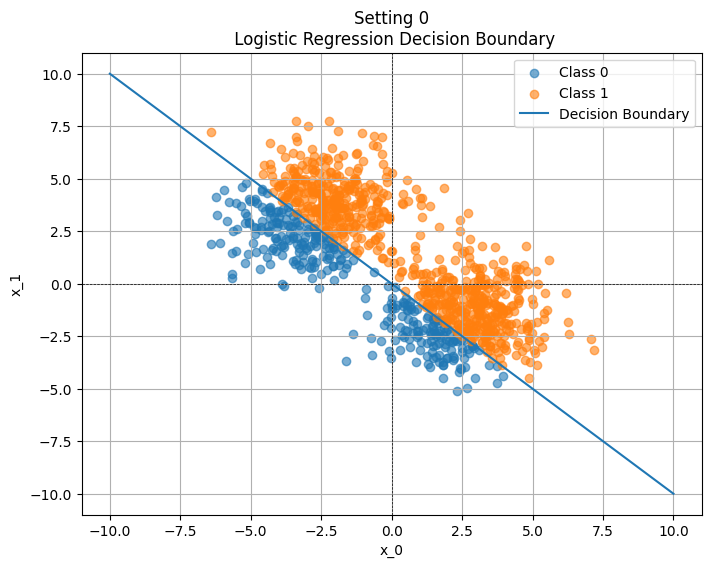

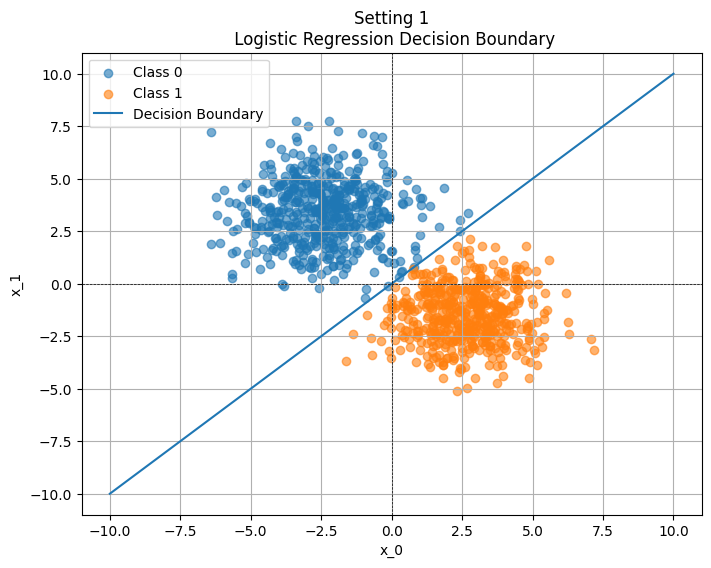

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_regression_labels(weights, X, bias=0.0):
    """
    Computes the logistic regression labels (0 or 1) for given input data X and a line defined by coefficients.

    Parameters:
        weights (numpy array): An array of coefficients corresponding to the variables x_0, x_1, ..., x_n.
        X (numpy array): A 2D array where each row is a data point, and columns correspond to the variables x_0, x_1, ..., x_n.
        bias (float, optional): The bias term b. Default is 0.0.

    Returns:
        numpy array: A 1D array of 0/1 logistic regression labels for each data point in X.
    """
    # Ensure weights and X dimensions align
    if X.shape[1] != weights.shape[0]:
        raise ValueError(f"Shape mismatch: X has {X.shape[1]} features, but weights has {weights.shape[0]} dimensions.")

    # Compute linear combination
    linear_combination = np.dot(X, weights) + bias

    # Apply the sigmoid function
    probabilities = 1 / (1 + np.exp(-linear_combination))

    # Convert probabilities to labels (0 or 1) based on a threshold of 0.5
    labels = (probabilities >= 0.5).astype(int)

    return labels

def plot_decision_boundary(weights, bias, show = True, title = ""):
    """
    Plots the decision boundary defined by the logistic regression weights and bias.

    Parameters:
        weights (numpy array): An array of coefficients corresponding to the variables x_0, x_1, ..., x_n.
        bias (float): The bias term b.
    """
    if len(weights) != 2:
        raise ValueError("This function only supports 2D data (weights must have exactly 2 elements).")

    # Generate x values for the line
    x_vals = np.linspace(-10, 10, 100)

    # Compute the corresponding y values for the decision boundary
    y_vals = -(weights[0] * x_vals + bias) / weights[1]

    # Plot the decision boundary
    plt.plot(x_vals, y_vals, label="Decision Boundary")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.xlabel("x_0")
    plt.ylabel("x_1")
    plt.title(f"{title}\n Logistic Regression Decision Boundary")
    plt.legend()
    plt.grid()
    if show:
        plt.show()




#print(f"generate data")
# Generate the data
n_samples = 500
d = 2
dist = 2.5
sigma = 2
bias = 1

mean_1 = np.array([-dist, dist+ bias])
mean_2 = np.array([dist, -dist+bias])

X, y = generate_gaussians(n_samples=n_samples, d=d, mean1=mean_1, mean2=mean_2,sigma=sigma )
#print(f"correct y- {y}")
weights_1 = np.array([1,1]) # y = mx + b
weights_2 = np.array([1,-1]) # y = mx + b
bias = 0
for i, weights in enumerate([weights_1, weights_2]):
    y = logistic_regression_labels(weights, X, bias)
    visualize_data(X, y, show = False )
    plot_decision_boundary(weights, bias, show = False, title = f"Setting {i}")

    plt.legend()
    plt.show()

y_1 = logistic_regression_labels(weights_1, X, bias)
y_2 = logistic_regression_labels(weights_2, X, bias)


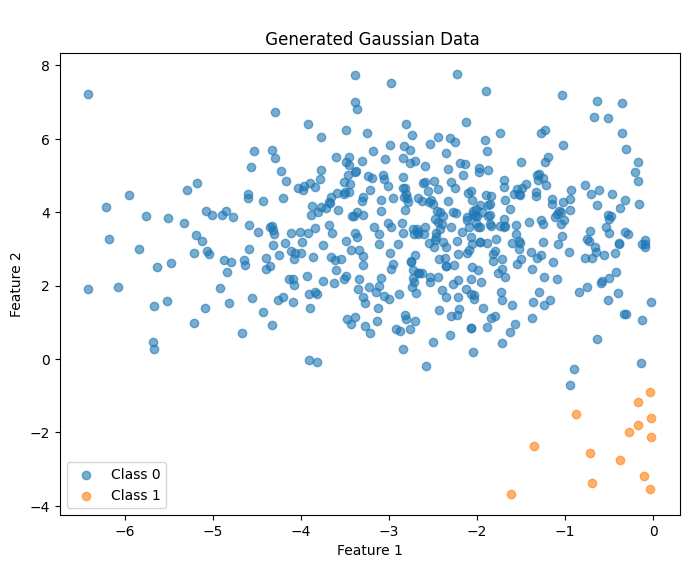

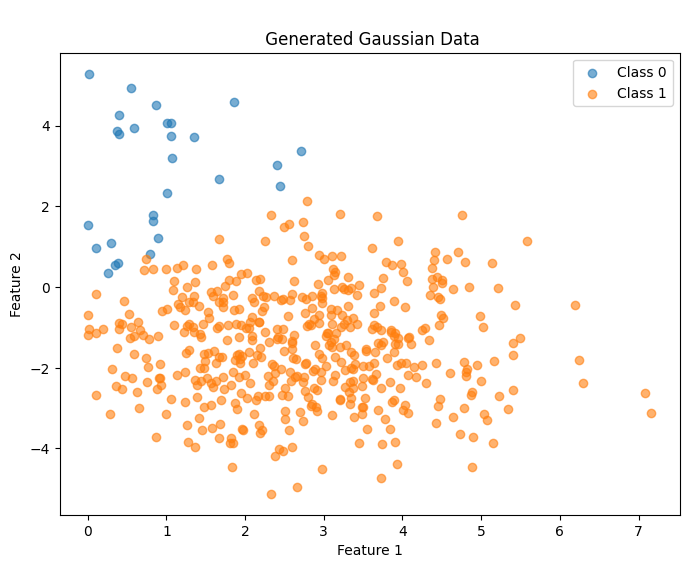

In [4]:
# forget set points are ones above 0
mask_forget = np.where(X[:, 0] > 0)
mask_retain = np.where(X[:, 0] < 0)
X_forget = X[mask_forget]
X_retain = X[mask_retain]
# plot retain 
visualize_data(X_retain, y[mask_retain], show = True )
# plot forget
visualize_data(X_forget, y[mask_forget], show = True )

# training Logistic Regression Basics

/var/folders/_k/5n658rw13cx_yy7kf5hwc1r80000gp/T/ipykernel_43478/2425938996.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


X - torch.Size([1000, 2]), y - torch.Size([1000, 1])
Epoch [1/200], Loss: 0.3467
Epoch [21/200], Loss: 0.2379
Epoch [41/200], Loss: 0.2348
Epoch [61/200], Loss: 0.2886
Epoch [81/200], Loss: 0.2877
Epoch [101/200], Loss: 0.1514
Epoch [121/200], Loss: 0.2086
Epoch [141/200], Loss: 0.0452
Epoch [161/200], Loss: 0.0658
Epoch [181/200], Loss: 0.1928


/var/folders/_k/5n658rw13cx_yy7kf5hwc1r80000gp/T/ipykernel_43478/2425938996.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_batch, dtype=torch.float32)
/var/folders/_k/5n658rw13cx_yy7kf5hwc1r80000gp/T/ipykernel_43478/2425938996.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_batch, dtype=torch.float32)


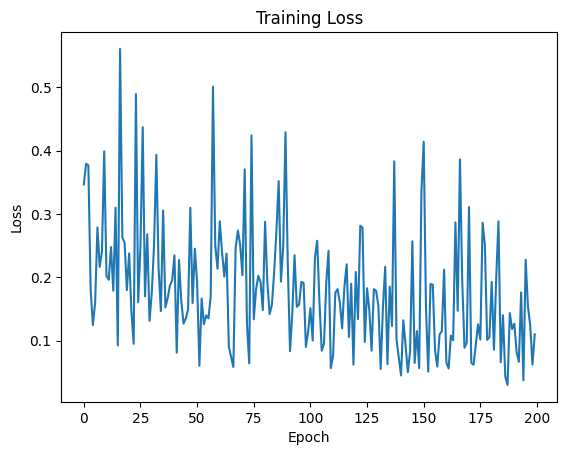

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Logistic Regression Model
class LogisticRegression_torch(nn.Module):
    def __init__(self, input_dim,device = torch.device("cpu")):
        super(LogisticRegression_torch, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer for binary classification
        self.device = device 

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation for logistic regression
    def predict(self, x):
        with torch.no_grad():
            return (self.forward(x) >= 0.5).float()

# Training Method
def train_logistic_regression_dataloader(model, data_loader, criterion, optimizer, epochs):
    losses = []
    for epoch in range(epochs):
        for inputs, labels in data_loader:
            # Move data to the appropriate device
            inputs, labels = inputs.to(model.device), labels.to(model.device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Print loss for the epoch
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")
        losses.append(loss.item())
    return losses

def train_logistic_regression(model, X,y, criterion, optimizer, batch_count = 100, batch_size = 32, X2 = None , y2 = None):
    losses = []
    for batch_idx in range(batch_count):
        
        # create a random batch
        if X2 is None:
            indices = np.random.choice(len(X), batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]
        else:
            half_batch = batch_size // 2
            indices = np.random.choice(len(X), half_batch, replace=False)
            indices2 = np.random.choice(len(X2), half_batch, replace=False)
            X_batch = np.vstack((X[indices], X2[indices2]))
            y_batch = np.hstack((y[indices], y2[indices2]))
        # Convert to tensors

        inputs = torch.tensor(X_batch, dtype=torch.float32)
        labels = torch.tensor(y_batch, dtype=torch.float32)

        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        if batch_idx % (batch_count // 10) == 0:
            # Print loss for the epoch
            print(f"Epoch [{batch_idx + 1}/{batch_count}], Loss: {loss.item():.4f}")
        losses.append(loss.item())
    return losses

# Hyperparameters
input_dim = 2  # Number of features in your dataset
learning_rate = 5e-3
epochs = 200
batch_size = 5

# random seed fix 
np.random.seed(42)

y = logistic_regression_labels(weights_2, X, bias)
y.shape
# y to tensor
y = torch.tensor(y)
y = y.unsqueeze(1)

y = torch.tensor(y, dtype=torch.float32)
X = torch.tensor(X, dtype=torch.float32)
print(f"X - {X.shape}, y - {y.shape}")



# Initialize model, loss function, and optimizer
model_ = LogisticRegression_torch(input_dim=input_dim,device = torch.device("cpu"))
criterion = nn.BCELoss()
optimizer = optim.SGD(model_.parameters(), lr=learning_rate)
# Train the model
losses = train_logistic_regression(model_, X,y, criterion, optimizer, batch_count = epochs, batch_size = batch_size)
# Plot the training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [6]:

model_.predict(X)[:3]

tensor([[0.],
        [0.],
        [0.]])

# Oracle Matching

In [15]:
def oracle_matching(model, oracle_model, retain_set, forget_set, batch_size = 32, batch_count = 1):
    
    forget_pt_count = batch_size //2
    retain_pt_count = batch_size //2
    # choose random forget points
    
    ten_percent = max(1, (batch_count // 10))
    losses = []
    for batch_idx in range(batch_count):
        # choose random data
        forget_indices = np.random.choice(len(forget_set), forget_pt_count, replace=False)
        forget_points = forget_set[forget_indices]

        retain_indices = np.random.choice(len(retain_set), retain_pt_count, replace=False)
        retain_points = retain_set[retain_indices]
        # to torch
        forget_points = torch.tensor(forget_points, dtype=torch.float32)
        retain_points = torch.tensor(retain_points, dtype=torch.float32)
        
        
        # get oracle labels
        y_forget = oracle_model.predict(forget_points)
        y_retain = oracle_model.predict(retain_points)
        X_batch = np.vstack((forget_points, retain_points))
        y_batch = np.vstack((y_forget, y_retain))
        inputs = torch.tensor(X_batch, dtype=torch.float32)
        labels = torch.tensor(y_batch, dtype=torch.float32)

        
        # train model on oracle results
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        if batch_idx % ten_percent == 0:
            # Print loss for the epoch
            print(f"Epoch [{batch_idx + 1}/{batch_count}], Loss: {loss.item():.4f}")
        losses.append(loss.item())
    return losses

# run oracle matching


/var/folders/_k/5n658rw13cx_yy7kf5hwc1r80000gp/T/ipykernel_43478/2748203023.py:21: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  linear_combination = np.dot(X, weights) + bias


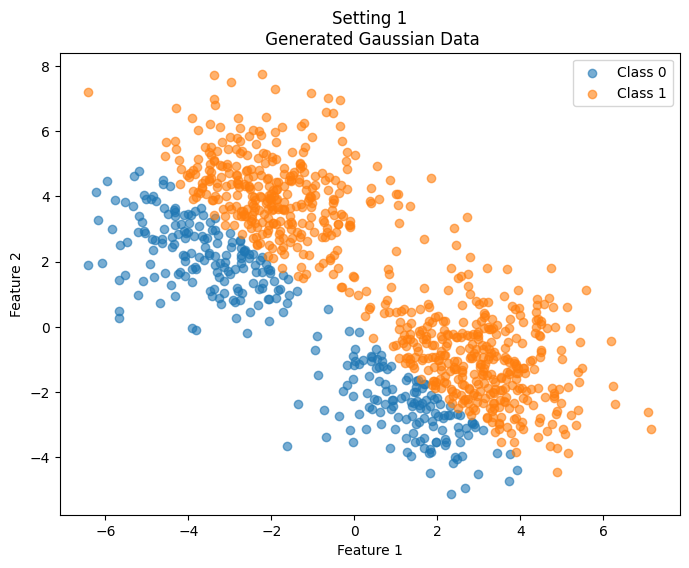

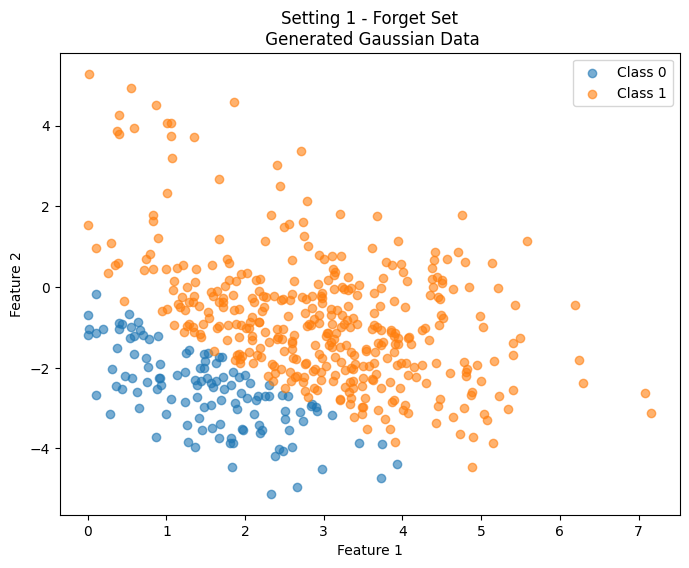

In [19]:

## Setting 1 
labels = logistic_regression_labels(weights_1, X, bias)



# plot X,y data
visualize_data(X, labels, show = True , title = "Setting 1")
forget_labels = logistic_regression_labels(weights_1, X_forget, bias)
visualize_data(X_forget, forget_labels, show = True , title = "Setting 1 - Forget Set")





Epoch [1/200], Loss: 1.1067
Epoch [21/200], Loss: 1.0205
Epoch [41/200], Loss: 0.6337
Epoch [61/200], Loss: 0.3350
Epoch [81/200], Loss: 0.1649
Epoch [101/200], Loss: 0.3021
Epoch [121/200], Loss: 0.1444
Epoch [141/200], Loss: 0.1546
Epoch [161/200], Loss: 0.1980
Epoch [181/200], Loss: 0.1675
Epoch [1/200], Loss: 0.4030
Epoch [21/200], Loss: 0.5411
Epoch [41/200], Loss: 0.3233
Epoch [61/200], Loss: 0.3789
Epoch [81/200], Loss: 0.1909
Epoch [101/200], Loss: 0.1264
Epoch [121/200], Loss: 0.3256
Epoch [141/200], Loss: 0.2080
Epoch [161/200], Loss: 0.0642
Epoch [181/200], Loss: 0.2475
Epoch [1/50], Loss: 0.1755
Epoch [6/50], Loss: 0.0693
Epoch [11/50], Loss: 0.2098
Epoch [16/50], Loss: 0.1072
Epoch [21/50], Loss: 0.0551
Epoch [26/50], Loss: 0.1105
Epoch [31/50], Loss: 0.4193
Epoch [36/50], Loss: 0.3586
Epoch [41/50], Loss: 0.1697
Epoch [46/50], Loss: 0.2084


/var/folders/_k/5n658rw13cx_yy7kf5hwc1r80000gp/T/ipykernel_43478/2425938996.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_batch, dtype=torch.float32)
/var/folders/_k/5n658rw13cx_yy7kf5hwc1r80000gp/T/ipykernel_43478/2425938996.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_batch, dtype=torch.float32)


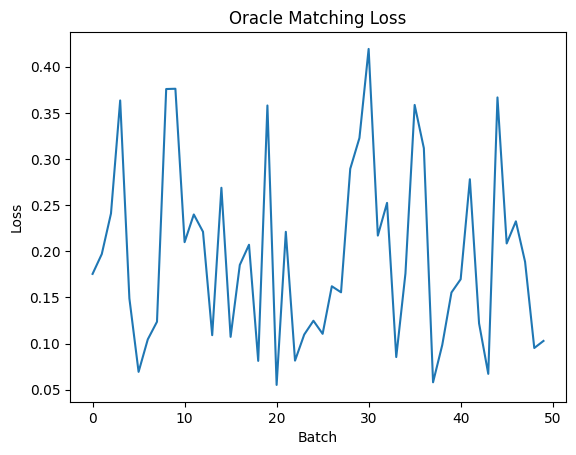

In [20]:

# train original model and oracle

# Initialize model, loss function, and optimizer
original_model = LogisticRegression_torch(input_dim=input_dim,device = torch.device("cpu"))
criterion = nn.BCELoss()
optimizer = optim.SGD(original_model.parameters(), lr=learning_rate)
# Train the model
losses = train_logistic_regression(original_model, X,y, criterion, optimizer, batch_count = epochs, batch_size = batch_size)


# setting 1
retain_x = X[mask_retain]
retain_y = y_1[mask_retain]
oracle_model = LogisticRegression_torch(input_dim=input_dim,device = torch.device("cpu"))
criterion = nn.BCELoss()
optimizer = optim.SGD(oracle_model.parameters(), lr=learning_rate)
# Train the model
losses = train_logistic_regression(oracle_model, X ,y, criterion, optimizer, batch_count = epochs, batch_size = batch_size)


# do one step oracle matching
distances = []
retain_distances = []
forget_distances = []
steps = 50
losses = oracle_matching(original_model, oracle_model, X_retain, X_forget, batch_size= 2, batch_count = steps)

# plot losses
plt.plot(losses)
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.title("Oracle Matching Loss")
plt.show()


## setting 2

/var/folders/_k/5n658rw13cx_yy7kf5hwc1r80000gp/T/ipykernel_43478/2748203023.py:21: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  linear_combination = np.dot(X, weights) + bias


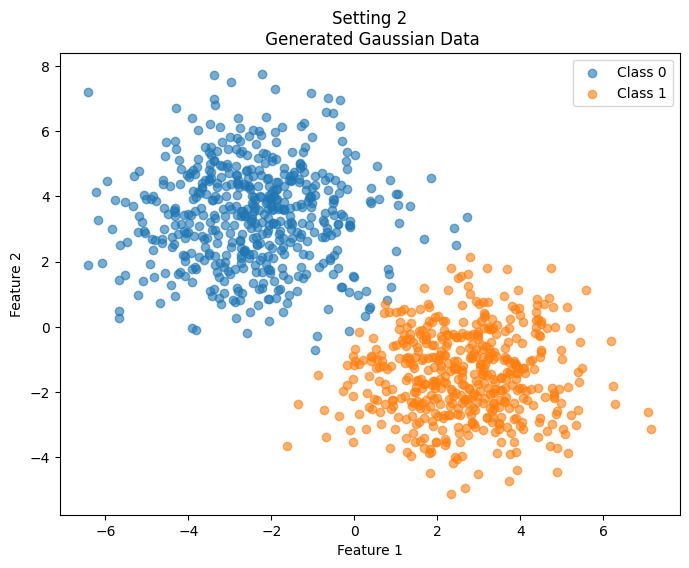

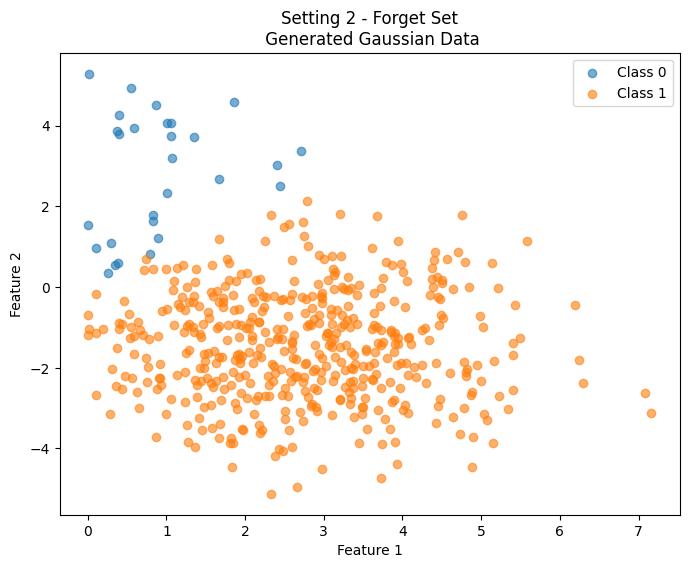

In [21]:


## Setting 2
labels = logistic_regression_labels(weights_2, X, bias)
original_model = LogisticRegression()
original_model.fit(X, labels)
visualize_data(X, labels, show = True , title = "Setting 2")
forget_labels = logistic_regression_labels(weights_2, X_forget, bias)
visualize_data(X_forget, forget_labels, show = True , title = "Setting 2 - Forget Set")


Epoch [1/200], Loss: 0.4130
Epoch [21/200], Loss: 0.5011
Epoch [41/200], Loss: 0.2950
Epoch [61/200], Loss: 0.2704
Epoch [81/200], Loss: 0.4559
Epoch [101/200], Loss: 0.2964
Epoch [121/200], Loss: 0.1009
Epoch [141/200], Loss: 0.1961
Epoch [161/200], Loss: 0.0625
Epoch [181/200], Loss: 0.2334
Epoch [1/200], Loss: 0.1575
Epoch [21/200], Loss: 0.0375
Epoch [41/200], Loss: 0.2382
Epoch [61/200], Loss: 0.1104
Epoch [81/200], Loss: 0.0478
Epoch [101/200], Loss: 0.0854
Epoch [121/200], Loss: 0.0475
Epoch [141/200], Loss: 0.1361
Epoch [161/200], Loss: 0.0565
Epoch [181/200], Loss: 0.0160
Epoch [1/50], Loss: 0.1668
Epoch [6/50], Loss: 0.0712
Epoch [11/50], Loss: 0.1504
Epoch [16/50], Loss: 0.0734
Epoch [21/50], Loss: 0.0888
Epoch [26/50], Loss: 0.1015
Epoch [31/50], Loss: 0.0541
Epoch [36/50], Loss: 0.0343
Epoch [41/50], Loss: 0.1777
Epoch [46/50], Loss: 0.0422


/var/folders/_k/5n658rw13cx_yy7kf5hwc1r80000gp/T/ipykernel_43478/2425938996.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_batch, dtype=torch.float32)
/var/folders/_k/5n658rw13cx_yy7kf5hwc1r80000gp/T/ipykernel_43478/2425938996.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_batch, dtype=torch.float32)


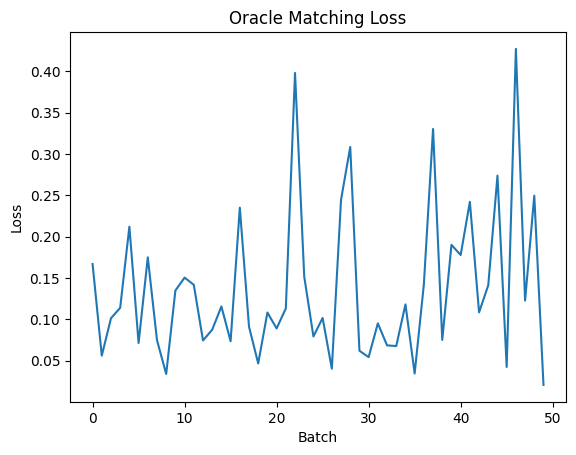

In [22]:

# train original model and oracle

# Initialize model, loss function, and optimizer
original_model = LogisticRegression_torch(input_dim=input_dim,device = torch.device("cpu"))
criterion = nn.BCELoss()
optimizer = optim.SGD(original_model.parameters(), lr=learning_rate)
# Train the model
losses = train_logistic_regression(original_model, X,y, criterion, optimizer, batch_count = epochs, batch_size = batch_size)


# setting 2
retain_x = X[mask_retain]
retain_y = y_2[mask_retain]
oracle_model = LogisticRegression_torch(input_dim=input_dim,device = torch.device("cpu"))
criterion = nn.BCELoss()
optimizer = optim.SGD(oracle_model.parameters(), lr=learning_rate)
# Train the model
losses = train_logistic_regression(oracle_model, X ,y, criterion, optimizer, batch_count = epochs, batch_size = batch_size)


# do one step oracle matching
distances = []
retain_distances = []
forget_distances = []
steps = 50
losses = oracle_matching(original_model, oracle_model, X_retain, X_forget, batch_size= 2, batch_count = steps)

# plot losses
plt.plot(losses)
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.title("Oracle Matching Loss")
plt.show()

# SCRAP extras

In [10]:

raise 

RuntimeError: No active exception to reraise

In [ ]:
def do_one_step_oracle_matching(model, oracle_model, retain_set, forget_set, batch_size = 32, lr = 0.01):
    raise
    forget_pt_count = batch_size //2
    retain_pt_count = batch_size //2
    # choose random forget points
    forget_indices = np.random.choice(len(forget_set), forget_pt_count, replace=False)
    forget_points = forget_set[forget_indices]
    # choose random retain points
    retain_indices = np.random.choice(len(retain_set), retain_pt_count, replace=False)
    retain_points = retain_set[retain_indices]
    # get oracle labels
    y_forget = oracle_model.predict(forget_points)
    y_retain = oracle_model.predict(retain_points)

    # TODO here - fix this to take an SGD step of the model
    #raise 
    # do SGD on the forget points with the labels from model_1
    model.fit(forget_points, y_forget)#, max_iter=1, warm_start=True)
    # do SGD on the retain points with the labels from model_2
    model.fit(retain_points, y_retain)#, max_iter=1, warm_start=True)
    return model

def distance_from_oracle(model, oracle_model, retain_points, forget_points):
    # get oracle labels
    oracle_forget = oracle_model.predict(forget_points)
    oracle_retain = oracle_model.predict(retain_points)

    # calculate distance from oracle
    forget_dist = np.mean(np.abs(oracle_forget - model.predict(forget_points)))
    retain_dist = np.mean(np.abs(oracle_retain - model.predict(retain_points)))
    return forget_dist, retain_dist


In [ ]:
if False:
    for i in range(steps):
        
        # get distance from oracle
        forget_dist, retain_dist = distance_from_oracle(model, oracle_model, X_retain, X_forget)
        #print(f"forget distance - {forget_dist}")
        retain_distances.append(retain_dist)
        forget_distances.append(forget_dist)

    #plot 
    plt.plot(range(steps), forget_distances, label="Margin distance on forget set ")
    plt.plot(range(steps), retain_distances, label="Margin distance on retain set ")

    plt.xlabel("Iteration")
    plt.ylabel("Distance from Oracle")

    plt.title("Distance from Oracle vs Iteration")
    plt.legend()
    plt.show()

In [ ]:

# Predict and visualize the decision boundary
def visualize_decision_boundary(X, y, model):
    """
    Visualize the decision boundary for logistic regression.

    Args:
        X (ndarray): Data points.
        y (ndarray): Labels for the data.
        model (LogisticRegression): Trained logistic regression model.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.6)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

visualize_decision_boundary(X, y, model)

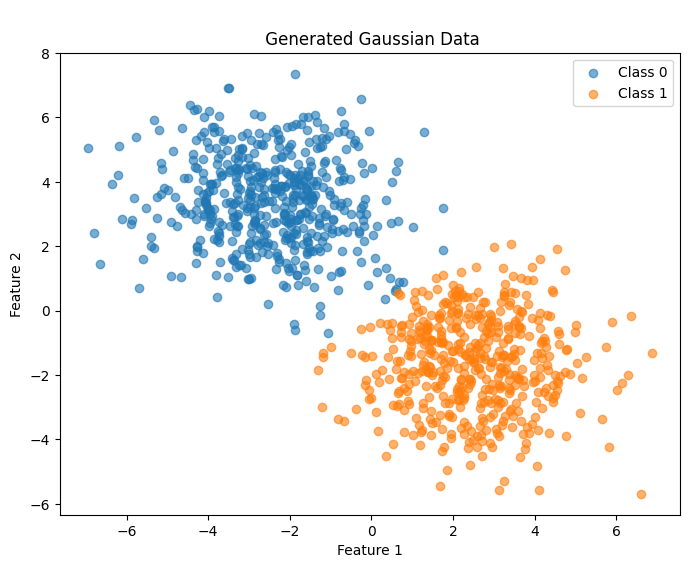

In [9]:
# plot X, y
# flatten y
y_flat = y.flatten()
visualize_data(X, y_flat, show = True )

In [10]:
dataset = torch.utils.data.TensorDataset(X, y)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)

# Model, Criterion, Optimizer
model = LogisticRegression(input_dim)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Device configuration (CPU or CUDA)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"train!")
# Train the model
train_logistic_regression(model, data_loader, criterion, optimizer, epochs)

train!
Epoch [1/200], Loss: 0.0126
Epoch [2/200], Loss: 0.0318
Epoch [3/200], Loss: 0.0153
Epoch [4/200], Loss: 0.1452
Epoch [5/200], Loss: 0.1800
Epoch [6/200], Loss: 0.0027
Epoch [7/200], Loss: 0.0046
Epoch [8/200], Loss: 0.0197
Epoch [9/200], Loss: 0.0004
Epoch [10/200], Loss: 0.0042
Epoch [11/200], Loss: 0.0013
Epoch [12/200], Loss: 0.0187
Epoch [13/200], Loss: 0.0012
Epoch [14/200], Loss: 0.0001
Epoch [15/200], Loss: 0.0264
Epoch [16/200], Loss: 0.0017
Epoch [17/200], Loss: 0.0209
Epoch [18/200], Loss: 0.0001
Epoch [19/200], Loss: 0.0196
Epoch [20/200], Loss: 0.0000
Epoch [21/200], Loss: 0.0006
Epoch [22/200], Loss: 0.0005
Epoch [23/200], Loss: 0.0005
Epoch [24/200], Loss: 0.0087
Epoch [25/200], Loss: 0.0003
Epoch [26/200], Loss: 0.0115
Epoch [27/200], Loss: 0.0045
Epoch [28/200], Loss: 0.4390
Epoch [29/200], Loss: 0.0000
Epoch [30/200], Loss: 0.0000
Epoch [31/200], Loss: 0.0076
Epoch [32/200], Loss: 0.0001
Epoch [33/200], Loss: 0.0001
Epoch [34/200], Loss: 0.0927
Epoch [35/200], 

[0.012616222724318504,
 0.031791266053915024,
 0.015302050858736038,
 0.1452185958623886,
 0.17999714612960815,
 0.0026791139971464872,
 0.0046357098035514355,
 0.01967376470565796,
 0.0003888663195539266,
 0.004215616267174482,
 0.0013110297732055187,
 0.018685858696699142,
 0.0012314817868173122,
 6.235513865249231e-05,
 0.026422563940286636,
 0.0017041178653016686,
 0.02090364508330822,
 0.00011526663729455322,
 0.019556615501642227,
 2.6647761842468753e-05,
 0.0005875438218936324,
 0.0004947903216816485,
 0.000508391996845603,
 0.008687046356499195,
 0.0002775615721475333,
 0.01148966420441866,
 0.0045094797387719154,
 0.4389991760253906,
 1.0693745025491808e-05,
 1.5788230030011619e-06,
 0.0076012215577065945,
 7.98428081907332e-05,
 0.0001306686899624765,
 0.0926501527428627,
 0.0024485483299940825,
 0.00014833960449323058,
 2.2931319108465686e-05,
 0.0006313030025921762,
 0.44184958934783936,
 0.036866385489702225,
 0.0005090936319902539,
 0.010416258126497269,
 1.53275523189222

train!
Epoch [1/200], Loss: 0.0575
Epoch [2/200], Loss: 0.0392
Epoch [3/200], Loss: 0.0180
Epoch [4/200], Loss: 0.0988
Epoch [5/200], Loss: 0.0256
Epoch [6/200], Loss: 0.0093
Epoch [7/200], Loss: 0.0188
Epoch [8/200], Loss: 0.0637
Epoch [9/200], Loss: 0.0188
Epoch [10/200], Loss: 0.0240
Epoch [11/200], Loss: 0.0773
Epoch [12/200], Loss: 0.0476
Epoch [13/200], Loss: 0.0025
Epoch [14/200], Loss: 0.0925
Epoch [15/200], Loss: 0.0524
Epoch [16/200], Loss: 0.0551
Epoch [17/200], Loss: 0.0022
Epoch [18/200], Loss: 0.0157
Epoch [19/200], Loss: 0.0035
Epoch [20/200], Loss: 0.0394
Epoch [21/200], Loss: 0.0029
Epoch [22/200], Loss: 0.0032
Epoch [23/200], Loss: 0.0172
Epoch [24/200], Loss: 0.0322
Epoch [25/200], Loss: 0.0002
Epoch [26/200], Loss: 0.0013
Epoch [27/200], Loss: 0.0324
Epoch [28/200], Loss: 0.0070
Epoch [29/200], Loss: 0.0091
Epoch [30/200], Loss: 0.0132
Epoch [31/200], Loss: 0.0325
Epoch [32/200], Loss: 0.0012
Epoch [33/200], Loss: 0.0025
Epoch [34/200], Loss: 0.0043
Epoch [35/200], 

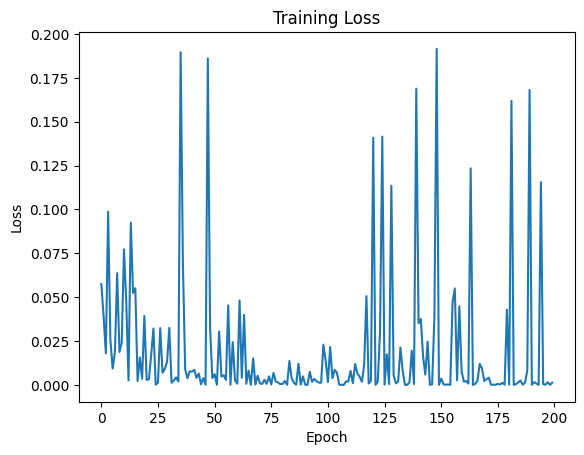

In [11]:
dataset = torch.utils.data.TensorDataset(X, y)



# Dummy Dataset (replace with your dataset and DataLoader)
#X = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [7.0, 8.0]])
#y = torch.tensor([[0.0], [0.0], [1.0], [1.0]])  # Binary labels
data_loader = torch.utils.data.DataLoader(dataset, batch_size=5, shuffle=True)

# Model, Criterion, Optimizer
model_ = LogisticRegression(input_dim)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model_.parameters(), lr=learning_rate)

# Device configuration (CPU or CUDA)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_.to(device)
print(f"train!")
# Train the model
losses = train_logistic_regression(model_, data_loader, criterion, optimizer, epochs)
# plot losses
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()